In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Assignment - Sheet1.csv")
df.head()

,Date,GDP Growth,Stock Index,Repo Rate,Unemployment Rate
0,3/31/1999,0.5,2028.21,11.875,9.1
1,6/30/1999,3.1,2486.96,9.125,11.9
2,9/30/1999,3.6,2096.20,9.000,8.4
3,12/31/1999,4.9,2142.97,8.750,9.5
4,3/31/2000,4.1,1681.72,8.750,9.5


In [ ]:
import seaborn as sns

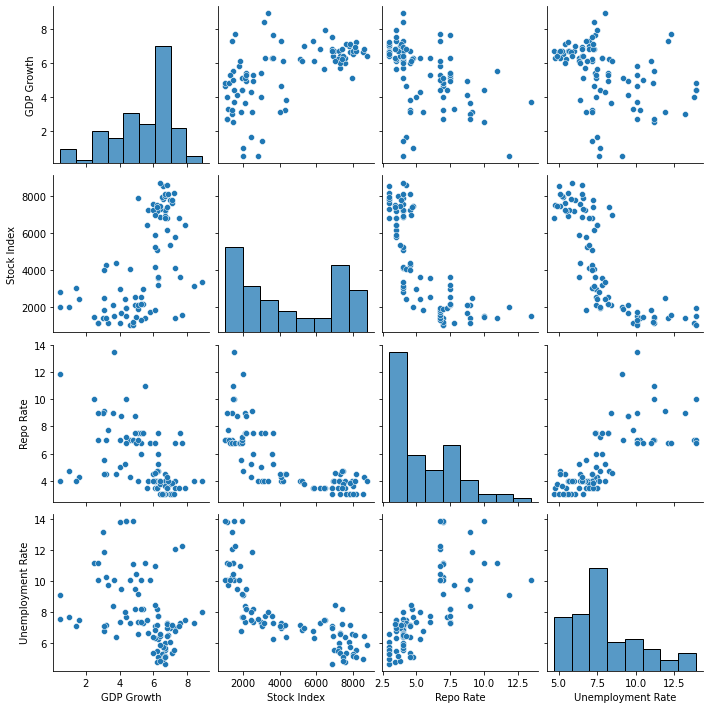

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Repo Rate', ylabel='GDP Growth'>

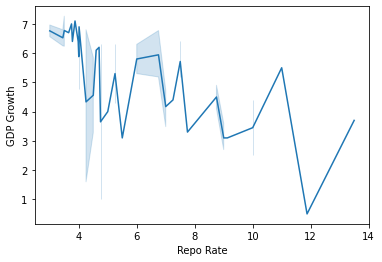

In [ ]:
sns.lineplot(data=df, x="Repo Rate", y="GDP Growth")

Adfuller Test For Unit Root

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df['GDP Growth'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.961693
p-value                  0.001625
# lags used              1.000000
# observations          89.000000
critical value (1%)     -3.506057
critical value (5%)     -2.894607
critical value (10%)    -2.584410
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(df['Stock Index'])

Augmented Dickey-Fuller Test: 
ADF test statistic       0.027279
p-value                  0.960731
# lags used              2.000000
# observations          88.000000
critical value (1%)     -3.506944
critical value (5%)     -2.894990
critical value (10%)    -2.584615
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
adf_test(df['Repo Rate'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.721326
p-value                  0.420159
# lags used              3.000000
# observations          87.000000
critical value (1%)     -3.507853
critical value (5%)     -2.895382
critical value (10%)    -2.584824
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
adf_test(df['Stock Index'])

Augmented Dickey-Fuller Test: 
ADF test statistic       0.027279
p-value                  0.960731
# lags used              2.000000
# observations          88.000000
critical value (1%)     -3.506944
critical value (5%)     -2.894990
critical value (10%)    -2.584615
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
adf_test(df['Unemployment Rate'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.545817
p-value                  0.510737
# lags used              8.000000
# observations          82.000000
critical value (1%)     -3.512738
critical value (5%)     -2.897490
critical value (10%)    -2.585949
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
df1 = df.copy()

In [ ]:
df1.drop('Date', axis = True)

,GDP Growth,Stock Index,Repo Rate,Unemployment Rate
0,0.5,2028.21,11.875,9.10
1,3.1,2486.96,9.125,11.90
2,3.6,2096.20,9.000,8.40
3,4.9,2142.97,8.750,9.50
4,4.1,1681.72,8.750,9.50
...,...,...,...,...
86,6.8,7425.25,3.450,7.25
87,7.1,7823.02,3.870,7.21
88,6.9,8120.15,4.010,6.54
89,6.8,8625.25,4.250,6.50


In [ ]:
df1['1stdiff_GDP Growth'] = df1['GDP Growth'] - df1['GDP Growth'].shift(1)

In [ ]:
df1['1stdiff_stock'] = df1['Stock Index'] - df1['Stock Index'].shift(1)

In [ ]:
df1['1stdiff_Repo'] = df1['Repo Rate'] - df1['Repo Rate'].shift(1)

In [ ]:
df1['1stdiff_Unemp'] = df1['Unemployment Rate'] - df1['Unemployment Rate'].shift(1)

In [ ]:
df1.head()

,Date,GDP Growth,Stock Index,Repo Rate,Unemployment Rate,1stdiff_GDP Growth,1stdiff_stock,1stdiff_Repo,1stdiff_Unemp
0,3/31/1999,0.5,2028.21,11.875,9.1,NaN,NaN,NaN,NaN
1,6/30/1999,3.1,2486.96,9.125,11.9,2.6,458.75,-2.750,2.8
2,9/30/1999,3.6,2096.20,9.000,8.4,0.5,-390.76,-0.125,-3.5
3,12/31/1999,4.9,2142.97,8.750,9.5,1.3,46.77,-0.250,1.1
4,3/31/2000,4.1,1681.72,8.750,9.5,-0.8,-461.25,0.000,0.0


In [ ]:
adf_test(df1['1stdiff_stock'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.279365e+00
p-value                 1.514580e-10
# lags used             1.000000e+00
# observations          8.800000e+01
critical value (1%)    -3.506944e+00
critical value (5%)    -2.894990e+00
critical value (10%)   -2.584615e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(df1['1stdiff_Repo'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.445316e+00
p-value                 1.571171e-08
# lags used             2.000000e+00
# observations          8.700000e+01
critical value (1%)    -3.507853e+00
critical value (5%)    -2.895382e+00
critical value (10%)   -2.584824e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(df1['1stdiff_Unemp'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.349624
p-value                  0.012801
# lags used              7.000000
# observations          82.000000
critical value (1%)     -3.512738
critical value (5%)     -2.897490
critical value (10%)    -2.585949
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
df1.head()

,Date,GDP Growth,Stock Index,Repo Rate,Unemployment Rate,1stdiff_GDP Growth,1stdiff_stock,1stdiff_Repo,1stdiff_Unemp
0,3/31/1999,0.5,2028.21,11.875,9.1,NaN,NaN,NaN,NaN
1,6/30/1999,3.1,2486.96,9.125,11.9,2.6,458.75,-2.750,2.8
2,9/30/1999,3.6,2096.20,9.000,8.4,0.5,-390.76,-0.125,-3.5
3,12/31/1999,4.9,2142.97,8.750,9.5,1.3,46.77,-0.250,1.1
4,3/31/2000,4.1,1681.72,8.750,9.5,-0.8,-461.25,0.000,0.0


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM, select_coint_rank, select_order

In [ ]:
# df1 = df1.drop('Date', axis = True)

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
df = df.drop("Date", axis = True)

granger causality tests

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,GDP Growth_x,Stock Index_x,Repo Rate_x,Unemployment Rate_x
GDP Growth_y,1.0000,0.0006,0.0091,0.1505
Stock Index_y,0.4943,1.0000,0.0260,0.2634
Repo Rate_y,0.1387,0.0942,1.0000,0.0001
Unemployment Rate_y,0.0050,0.0001,0.0001,1.0000


Cointegration_test

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
GDP Growth ::  52.72     > 40.1749   =>   True
Stock Index ::  28.3      > 24.2761   =>   True
Repo Rate ::  13.88     > 12.3212   =>   True
Unemployment Rate ::  2.12      > 4.1296    =>   False


In [ ]:
df_differenced = df.diff().dropna()

In [ ]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  12.138743004049603
BIC :  12.697987132079298
FPE :  187065.99266047793
HQIC:  12.364158263277002 

Lag Order = 2
AIC :  12.049127882273819
BIC :  13.062583851833086
FPE :  171441.70379461366
HQIC:  12.45742385295546 

Lag Order = 3
AIC :  12.075751832248908
BIC :  13.5496279491459
FPE :  177153.15227773343
HQIC:  12.669236295320857 

Lag Order = 4
AIC :  12.060699000622867
BIC :  14.001345699986107
FPE :  176626.671998156
HQIC:  12.841719389156879 

Lag Order = 5
AIC :  12.070472355698811
BIC :  14.484386538583358
FPE :  182084.43926520503
HQIC:  13.04141615706704 

Lag Order = 6
AIC :  12.057252102605256
BIC :  14.951081625037771
FPE :  185635.70834824682
HQIC:  13.220547212207002 

Lag Order = 7
AIC :  12.05461823250906
BIC :  15.435166551839247
FPE :  194365.71815938293
HQIC:  13.412733250999427 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,10.90*,11.02*,5.410e+04*,10.95*
1,11.11,11.72,6.705e+04,11.35
2,11.04,12.13,6.249e+04,11.47
3,11.15,12.72,7.045e+04,11.78
4,11.29,13.34,8.197e+04,12.11
5,11.40,13.94,9.433e+04,12.42
6,11.32,14.34,9.078e+04,12.53
7,11.50,15.00,1.146e+05,12.90
8,11.64,15.63,1.421e+05,13.23
9,11.55,16.03,1.451e+05,13.34


In [ ]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Mar, 2023
Time:                     10:43:24
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    13.0626
Nobs:                     88.0000    HQIC:                   12.4574
Log likelihood:          -993.628    FPE:                    171442.
AIC:                      12.0491    Det(Omega_mle):         116134.
--------------------------------------------------------------------
Results for equation GDP Growth
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.001417         0.138472            0.010           0.992
L1.GDP Growth                0.006789         0.112279            0.060           0.952
L1.Stock Index             

checking for serial corr

In [ ]:
# from statsmodels.stats.stattools import durbin_watson
# out = durbin_watson(model_fitted.resid)

# for col, val in zip(df.columns, out):
#     print(adjust(col), ':', round(val, 2))